In [49]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers
from IPython.display import clear_output

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [3]:
def combine_patch_data(patch_data, variables):
    ds = xr.concat([patch_data[variable] for variable in variables], pd.Index(variables, name="var_name"))
    return ds.transpose("p", "row", "col", "var_name")

In [4]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 100
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr", "UP_HELI_MAX_curr", "masks"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train_ds = xr.concat(data_list, dim="p")
input_train_ds["p"] = np.arange(input_train_ds["p"].size)
input_train = combine_patch_data(input_train_ds, ["REFL_COM_curr", "UP_HELI_MAX_curr"])
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val_ds = xr.concat(data_list, dim="p")
input_val_ds["p"] = np.arange(input_val_ds["p"].size)
input_val = combine_patch_data(input_val_ds, ["REFL_COM_curr", "UP_HELI_MAX_curr"])
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test_ds = xr.concat(data_list, dim="p")
input_test_ds["p"] = np.arange(input_test_ds["p"].size)
input_test = combine_patch_data(input_test_ds, ["REFL_COM_curr", "UP_HELI_MAX_curr"])

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
Validation 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
Test 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTO

In [13]:
# Pull variables from csv files and join into an array
csv_variables = ["eccentricity", "major_axis_length", "Track_ID", "Step_ID"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train_ds = xr.concat(csv_data_list, dim="p").to_array().transpose()
output_train_ds["p"] = np.arange(output_train_ds["p"].size)
output_train = output_train_ds[:, :2]
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val_ds = xr.concat(csv_data_list, dim="p").to_array().transpose()
output_val_ds["p"] = np.arange(output_val_ds["p"].size)
output_val = output_val_ds[:, :2]
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test_ds = xr.concat(csv_data_list, dim="p").to_array().transpose()
output_test_ds["p"] = np.arange(output_test_ds["p"].size)
output_test = output_test_ds[:, :2]

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Validation 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Test 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCA

In [16]:
print(input_train.shape)
print(input_val.shape)
print(input_test.shape)
print(output_train.shape)
print(output_val.shape)
print(output_test.shape)

(17733, 144, 144, 2)
(5857, 144, 144, 2)
(9813, 144, 144, 2)
(17733, 2)
(5857, 2)
(9813, 2)


## Normalize data

In [17]:
# Normalize the training data
scale_stats = pd.DataFrame(index=range(input_train.shape[-1]), columns=["mean", "sd"])
scale_stats.loc[:, "mean"] = input_train.mean(dim=("p", "row", "col"))
scale_stats.loc[:, "sd"] = input_train.std(dim=("p", "row", "col"))
input_train_norm = xr.DataArray(coords=input_train.coords, dims=input_train.dims)
input_val_norm = xr.DataArray(coords=input_val.coords, dims=input_val.dims)
input_test_norm = xr.DataArray(coords=input_test.coords, dims=input_test.dims)
for i in range(input_train.shape[-1]):
    input_train_norm[:, :, :, i] = (input_train[:, :, :, i] - scale_stats.loc[i, "mean"]) / scale_stats.loc[i, "sd"]
    input_val_norm[:, :, :, i] = (input_val[:, :, :, i] - scale_stats.loc[i, "mean"]) / scale_stats.loc[i, "sd"]
    input_test_norm[:, :, :, i] = (input_test[:, :, :, i] - scale_stats.loc[i, "mean"]) / scale_stats.loc[i, "sd"]

In [18]:
# Add max UP_HELI_MAX_curr inside masked storm area to output data
train_masked_storms = input_train.sel(var_name="UP_HELI_MAX_curr") * input_train_ds["masks"]
output_train = xr.concat(
    [
        output_train,
        train_masked_storms.max(dim=("row", "col")).drop_vars("var_name").expand_dims(axis=-1, dim={"variable": ["UP_HELI_MAX_curr"]})
    ],
    dim="variable")
val_masked_storms = input_val.sel(var_name="UP_HELI_MAX_curr") * input_val_ds["masks"]
output_val = xr.concat(
    [
        output_val,
        val_masked_storms.max(dim=("row", "col")).drop_vars("var_name").expand_dims(axis=-1, dim={"variable": ["UP_HELI_MAX_curr"]})
    ],
    dim="variable")
test_masked_storms = input_test.sel(var_name="UP_HELI_MAX_curr") * input_test_ds["masks"]
output_test = xr.concat(
    [
        output_test,
        test_masked_storms.max(dim=("row", "col")).drop_vars("var_name").expand_dims(axis=-1, dim={"variable": ["UP_HELI_MAX_curr"]})
    ],
    dim="variable")

In [19]:
# Threshold output data
thresholds = [.95, 75, 75]
output_train_thresh = xr.DataArray(coords=output_train.coords, dims=output_train.dims)
output_val_thresh = xr.DataArray(coords=output_val.coords, dims=output_val.dims)
output_test_thresh = xr.DataArray(coords=output_test.coords, dims=output_test.dims)
for i, val in enumerate(thresholds):
    output_train_thresh[:, i] = np.where(output_train.values[:, i] > thresholds[i], 1, 0)
    output_val_thresh[:, i] = np.where(output_val.values[:, i] > thresholds[i], 1, 0)
    output_test_thresh[:, i] = np.where(output_test.values[:, i] > thresholds[i], 1, 0)

## RICNN

In [23]:
reg = tf.keras.regularizers.L2(l2=0.001)
ricnn_model = models.Sequential()
ricnn_model.add(GDL_layers.RotEquivConv2D(16, (5, 5), rot_axis=False, activation=None, kernel_regularizer=reg, input_shape=(144, 144, 2)))
ricnn_model.add(layers.LeakyReLU(alpha=0.1))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(24, (5, 5), activation=None, kernel_regularizer=reg))
ricnn_model.add(layers.LeakyReLU(alpha=0.1))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(36, (5, 5), activation=None, kernel_regularizer=reg))
ricnn_model.add(layers.LeakyReLU(alpha=0.1))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotEquivConv2D(54, (5, 5), activation=None, kernel_regularizer=reg))
ricnn_model.add(layers.LeakyReLU(alpha=0.1))
ricnn_model.add(GDL_layers.RotEquivPool2D((2, 2)))
ricnn_model.add(GDL_layers.RotInvPool())
ricnn_model.add(layers.Flatten())
ricnn_model.add(layers.Dense(128, activation='relu'))
ricnn_model.add(layers.Dense(3, activation='sigmoid'))

In [24]:
ricnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
ricnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_4 (RotEqui  (None, 140, 140, 4, 16)  816       
 vConv2D)                                                        
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 140, 140, 4, 16)   0         
                                                                 
 rot_equiv_pool2d_4 (RotEqui  (None, 70, 70, 4, 16)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_5 (RotEqui  (None, 66, 66, 4, 24)    9624      
 vConv2D)                                                        
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 66, 66, 4, 24)     0         
                                                      

In [26]:
ricnn_history = ricnn_model.fit(
    x=input_train_norm,
    y=output_train_thresh,
    epochs=30,
    batch_size=256,
    validation_data=(input_val_norm, output_val_thresh)
)

Epoch 1/30
70/70 [==============================] - 31s 397ms/step - loss: 0.3544 - accuracy: 0.7682 - val_loss: 0.2581 - val_accuracy: 0.9194
Epoch 2/30
70/70 [==============================] - 27s 386ms/step - loss: 0.2767 - accuracy: 0.8366 - val_loss: 0.2125 - val_accuracy: 0.9211
Epoch 3/30
70/70 [==============================] - 27s 386ms/step - loss: 0.2413 - accuracy: 0.8500 - val_loss: 0.1861 - val_accuracy: 0.8542
Epoch 4/30
70/70 [==============================] - 27s 392ms/step - loss: 0.2136 - accuracy: 0.8473 - val_loss: 0.1808 - val_accuracy: 0.9015
Epoch 5/30
70/70 [==============================] - 27s 386ms/step - loss: 0.1895 - accuracy: 0.8446 - val_loss: 0.1650 - val_accuracy: 0.8725
Epoch 6/30
70/70 [==============================] - 27s 390ms/step - loss: 0.1714 - accuracy: 0.8459 - val_loss: 0.1652 - val_accuracy: 0.8339
Epoch 7/30
70/70 [==============================] - 27s 386ms/step - loss: 0.1583 - accuracy: 0.8378 - val_loss: 0.1433 - val_accuracy: 0.8740

## CNN

In [27]:
reg = tf.keras.regularizers.L2(l2=0.001)
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(16, (5, 5), activation=None, kernel_regularizer=reg, input_shape=(144, 144, 2)))
cnn_model.add(layers.LeakyReLU(alpha=0.1))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(24, (5, 5), activation=None, kernel_regularizer=reg))
cnn_model.add(layers.LeakyReLU(alpha=0.1))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(36, (5, 5), activation=None, kernel_regularizer=reg))
cnn_model.add(layers.LeakyReLU(alpha=0.1))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(54, (5, 5), activation=None, kernel_regularizer=reg))
cnn_model.add(layers.LeakyReLU(alpha=0.1))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(3, activation='sigmoid'))

In [28]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 140, 140, 16)      816       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 140, 140, 16)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 70, 70, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 66, 66, 24)        9624      
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 66, 66, 24)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 33, 33, 24)       0         
 g2D)                                                 

In [29]:
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [30]:
cnn_history = cnn_model.fit(
    x=input_train_norm,
    y=output_train_thresh,
    epochs=30,
    batch_size=256,
    validation_data=(input_val_norm, output_val_thresh)
)

Epoch 1/30
70/70 [==============================] - 12s 162ms/step - loss: 0.3528 - accuracy: 0.7803 - val_loss: 0.2484 - val_accuracy: 0.8904
Epoch 2/30
70/70 [==============================] - 11s 159ms/step - loss: 0.2715 - accuracy: 0.8467 - val_loss: 0.2145 - val_accuracy: 0.9003
Epoch 3/30
70/70 [==============================] - 11s 158ms/step - loss: 0.2412 - accuracy: 0.8509 - val_loss: 0.2125 - val_accuracy: 0.9285
Epoch 4/30
70/70 [==============================] - 11s 159ms/step - loss: 0.2145 - accuracy: 0.8542 - val_loss: 0.1927 - val_accuracy: 0.9122
Epoch 5/30
70/70 [==============================] - 11s 161ms/step - loss: 0.1922 - accuracy: 0.8569 - val_loss: 0.1726 - val_accuracy: 0.8866
Epoch 6/30
70/70 [==============================] - 12s 174ms/step - loss: 0.1825 - accuracy: 0.8589 - val_loss: 0.1665 - val_accuracy: 0.8894
Epoch 7/30
70/70 [==============================] - 11s 159ms/step - loss: 0.1636 - accuracy: 0.8618 - val_loss: 0.1650 - val_accuracy: 0.9104

## History Plots

(0.0, 0.9051146954298019)

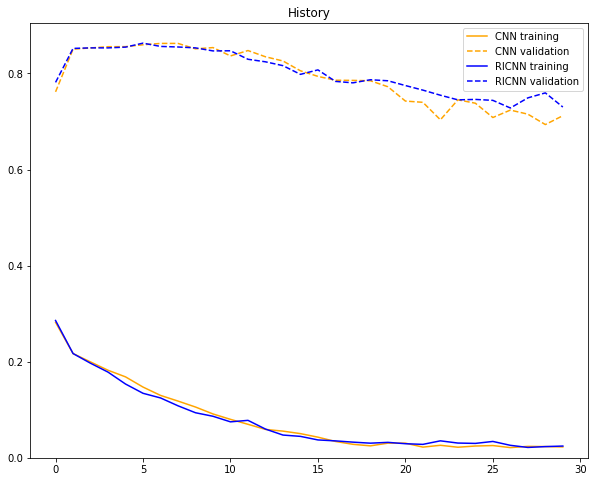

In [21]:
F, ax = plt.subplots(figsize=(10, 8))
ax = plt.gca()
a = ax.plot(cnn_history.history['loss'], label='CNN training', color='orange')
b = ax.plot(cnn_history.history['accuracy'], label='CNN validation', color='orange', linestyle='dashed')
c = ax.plot(ricnn_history.history['loss'], label='RICNN training', color='blue')
d = ax.plot(ricnn_history.history['accuracy'], label='RICNN validation', color='blue', linestyle='dashed')
ax.legend()
ax.set_title("History")
ax.set_ylim(bottom=0)

## Save and load models

In [21]:
ricnn_model.save("saved_models/semi_supervised_ricnn/ricnn_model")
cnn_model.save("saved_models/semi_supervised_ricnn/cnn_model")

INFO:tensorflow:Assets written to: saved_models/semi_supervised_ricnn/ricnn_model/assets


INFO:tensorflow:Assets written to: saved_models/semi_supervised_ricnn/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/semi_supervised_ricnn/cnn_model/assets


In [20]:
ricnn_model = tf.keras.models.load_model("saved_models/semi_supervised_ricnn/ricnn_model")
cnn_model = tf.keras.models.load_model("saved_models/semi_supervised_ricnn/cnn_model")

2022-08-25 12:01:17.541855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 12:01:20.501240: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0


## Evaluate Models

In [21]:
ricnn_model.evaluate(input_test_norm, output_test_thresh)
cnn_model.evaluate(input_test_norm, output_test_thresh)

2022-08-25 12:01:28.340831: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


307/307 [==============================] - 5s 17ms/step - loss: 1.2096 - mse: 1.2096


[1.2096076011657715, 1.2096076011657715]

## Clustering

In [22]:
ricnn_latent_model = tf.keras.Model(ricnn_model.inputs, ricnn_model.layers[-2].output)
cnn_latent_model = tf.keras.Model(cnn_model.inputs, cnn_model.layers[-2].output)

In [23]:
ricnn_latent_train = ricnn_latent_model.predict(input_train_norm)
cnn_latent_train = ricnn_latent_model.predict(input_train_norm)

555/555 [==============================] - 17s 31ms/step


In [24]:
ricnn_latent_val = ricnn_latent_model.predict(input_val_norm)
cnn_latent_val = cnn_latent_model.predict(input_val_norm)
ricnn_latent_test = ricnn_latent_model.predict(input_test_norm)
cnn_latent_test = cnn_latent_model.predict(input_test_norm)

307/307 [==============================] - 5s 16ms/step


In [25]:
from sklearn.mixture import GaussianMixture

In [26]:
ricnn_gmm = GaussianMixture(n_components=25, verbose=2)
ricnn_gmm.fit(ricnn_latent_train)

Initialization 0
  Iteration 10	 time lapse 3.34035s	 ll change 0.12578
  Iteration 20	 time lapse 1.72012s	 ll change 0.02795
Initialization converged: True	 time lapse 5.92039s	 ll 146.54856


GaussianMixture(n_components=25, verbose=2)

In [27]:
cnn_gmm = GaussianMixture(n_components=25, verbose=2)
cnn_gmm.fit(cnn_latent_train)

Initialization 0
  Iteration 10	 time lapse 2.08836s	 ll change 0.21534
  Iteration 20	 time lapse 1.72830s	 ll change 0.00779
  Iteration 30	 time lapse 1.71512s	 ll change 0.00257
Initialization converged: True	 time lapse 5.72876s	 ll 146.81132


GaussianMixture(n_components=25, verbose=2)

In [28]:
ricnn_val_labels = ricnn_gmm.predict(ricnn_latent_val)
cnn_val_labels = cnn_gmm.predict(cnn_latent_val)

In [29]:
ricnn_val_probs = ricnn_gmm.predict_proba(ricnn_latent_val)
cnn_val_probs = cnn_gmm.predict_proba(cnn_latent_val)

In [30]:
def extract_label_and_prob(prob_mat):
    labels = np.argmax(prob_mat, axis=1)
    probs = np.array([prob_mat[i, labels[i]] for i in range(prob_mat.shape[0])])
    return np.column_stack([labels, probs])

In [31]:
ricnn_gmm_labels = pd.DataFrame(extract_label_and_prob(ricnn_val_probs), columns=["labels", "probs"])
cnn_gmm_labels = pd.DataFrame(extract_label_and_prob(cnn_val_probs), columns=["labels", "probs"])

In [34]:
np.unique(cnn_gmm_labels['labels'])

array([ 0.,  2.,  3.,  5.,  9., 11., 18., 19., 20., 22.])

In [37]:
tr_min = input_train_norm[:, :, :, 0].min()
tr_max = input_train_norm[:, :, :, 0].max()

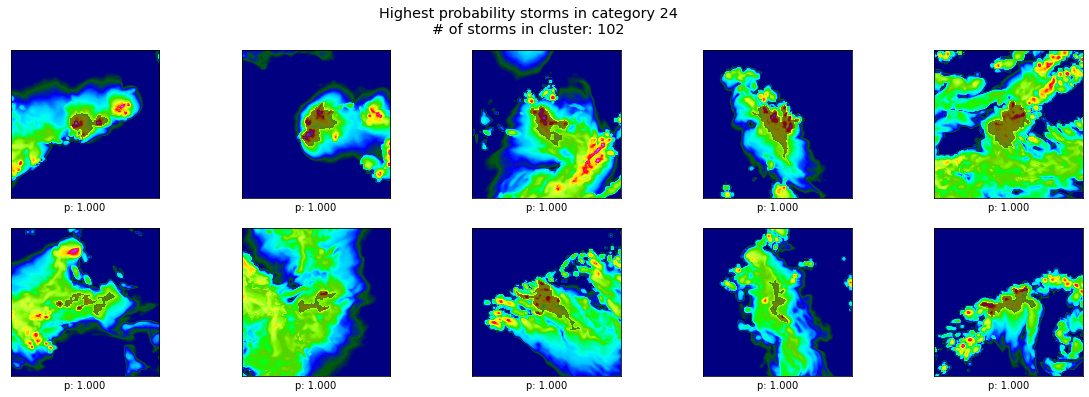

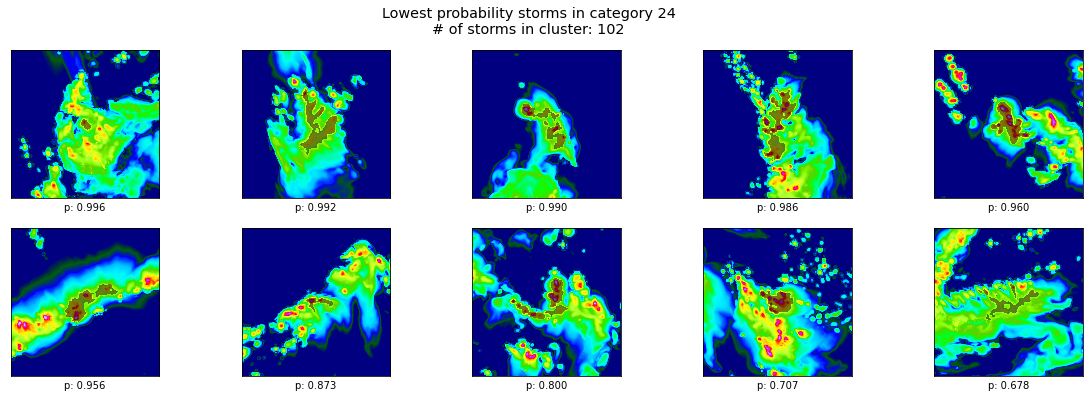

 D


In [54]:
ricnn_cluster_labels = []
for cluster_id in range(25):

    filtered_sorted_df = ricnn_gmm_labels.loc[ricnn_gmm_labels['labels']==cluster_id].sort_values('probs', ascending=False)

    F, ax = plt.subplots(2, 5, figsize=(20, 6))
    plt.suptitle(f'Highest probability storms in category {cluster_id}\n# of storms in cluster: {filtered_sorted_df.shape[0]}', fontsize='x-large')
    for n, sample_id in enumerate(filtered_sorted_df.index[0:10]):
        sample = input_val_norm[sample_id, :, :, 0]
        i = n // 5
        j = n % 5
        ax[i, j].imshow(sample, cmap='gist_ncar', clim=(tr_min, tr_max))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_xlabel(f"p: {filtered_sorted_df.loc[sample_id]['probs']:.3f}")
        mask = np.ma.masked_where(input_val_ds['masks'][sample_id, :, :] == 0, input_val_ds['masks'][sample_id, :, :])
        ax[i, j].imshow(mask, alpha=.5, cmap='gray')
    F.set_facecolor('white')

    F, ax = plt.subplots(2, 5, figsize=(20, 6))
    plt.suptitle(f'Lowest probability storms in category {cluster_id}\n# of storms in cluster: {filtered_sorted_df.shape[0]}', fontsize='x-large')
    for n, sample_id in enumerate(filtered_sorted_df.index[-10:]):
        sample = input_val_norm[sample_id, :, :, 0]
        i = n // 5
        j = n % 5
        ax[i, j].imshow(sample, cmap='gist_ncar', clim=(tr_min, tr_max))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_xlabel(f"p: {filtered_sorted_df.loc[sample_id]['probs']:.3f}")
        mask = np.ma.masked_where(input_val_ds['masks'][sample_id, :, :] == 0, input_val_ds['masks'][sample_id, :, :])
        ax[i, j].imshow(mask, alpha=.5, cmap='gray')
    F.set_facecolor('white')
    
    plt.show()
    
    label = input()
    ricnn_cluster_labels.append(label)
    
    clear_output(wait=True)

In [56]:
ricnn_cluster_labels

['D',
 'D',
 'Q',
 'D',
 'D',
 'S',
 'S',
 'D',
 'D',
 'Q',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'S',
 'S',
 'E',
 'D',
 'D',
 'S',
 'D',
 'D',
 'D']

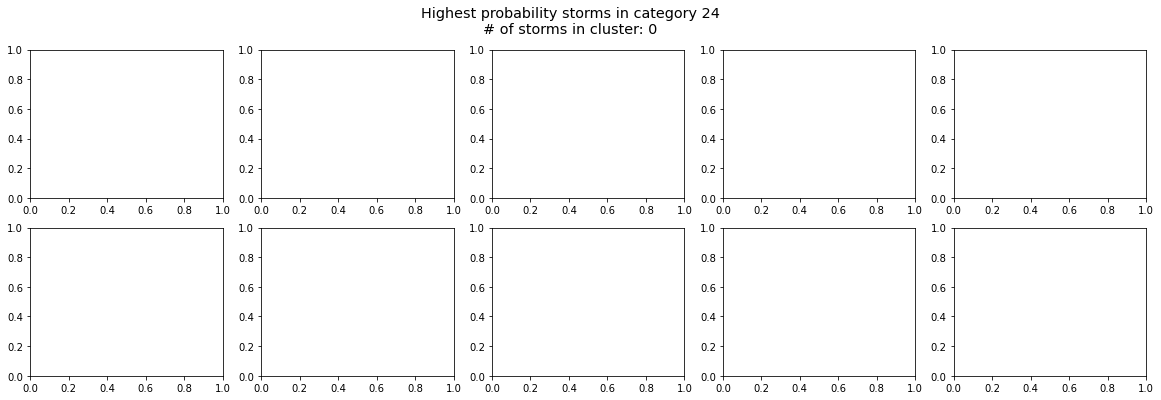

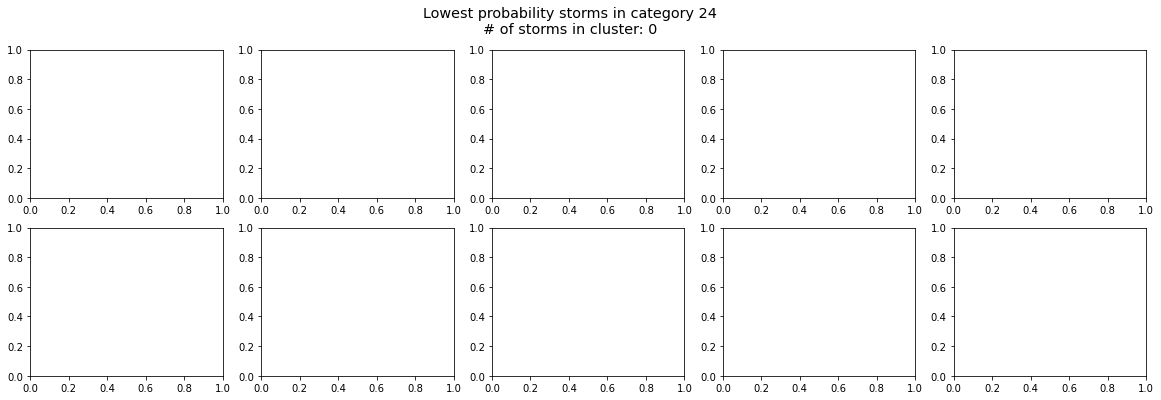

 E


In [57]:
cnn_cluster_labels = []
for cluster_id in range(25):

    filtered_sorted_df = cnn_gmm_labels.loc[cnn_gmm_labels['labels']==cluster_id].sort_values('probs', ascending=False)

    F, ax = plt.subplots(2, 5, figsize=(20, 6))
    plt.suptitle(f'Highest probability storms in category {cluster_id}\n# of storms in cluster: {filtered_sorted_df.shape[0]}', fontsize='x-large')
    for n, sample_id in enumerate(filtered_sorted_df.index[0:10]):
        sample = input_val_norm[sample_id, :, :, 0]
        i = n // 5
        j = n % 5
        ax[i, j].imshow(sample, cmap='gist_ncar', clim=(tr_min, tr_max))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_xlabel(f"p: {filtered_sorted_df.loc[sample_id]['probs']:.3f}")
        mask = np.ma.masked_where(input_val_ds['masks'][sample_id, :, :] == 0, input_val_ds['masks'][sample_id, :, :])
        ax[i, j].imshow(mask, alpha=.5, cmap='gray')
    F.set_facecolor('white')

    F, ax = plt.subplots(2, 5, figsize=(20, 6))
    plt.suptitle(f'Lowest probability storms in category {cluster_id}\n# of storms in cluster: {filtered_sorted_df.shape[0]}', fontsize='x-large')
    for n, sample_id in enumerate(filtered_sorted_df.index[-10:]):
        sample = input_val_norm[sample_id, :, :, 0]
        i = n // 5
        j = n % 5
        ax[i, j].imshow(sample, cmap='gist_ncar', clim=(tr_min, tr_max))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_xlabel(f"p: {filtered_sorted_df.loc[sample_id]['probs']:.3f}")
        mask = np.ma.masked_where(input_val_ds['masks'][sample_id, :, :] == 0, input_val_ds['masks'][sample_id, :, :])
        ax[i, j].imshow(mask, alpha=.5, cmap='gray')
    F.set_facecolor('white')
    
    plt.show()
    
    label = input()
    cnn_cluster_labels.append(label)
    
    clear_output(wait=True)

In [62]:
cnn_cluster_labels

['D',
 'E',
 'S',
 'S',
 'E',
 'Q',
 'E',
 'E',
 'E',
 'D',
 'E',
 'D',
 'E',
 'E',
 'E',
 'E',
 'E',
 'E',
 'D',
 'Q',
 'D',
 'E',
 'Q',
 'E',
 'E']